# Project: Investigate a Dataset - [TMDb movie data]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success? 


### Question(s) for Analysis :
<ul>
<li>1.Which genres are most popular from year to year?</li>
<li>2.What kinds of properties are associated with movies that have high revenues?</li>
<li>3.In which year there was the hight average voting?</li>
<li>4.In which movie there was the longest & shortest runtime?</li>
<li>5.In which year was the largest number of movies?</li>
<li>6.What kinds of properties are associated with movies that have high budget?</li>
</ul>

In [79]:
#import statements for all of the packages that i will use
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties

In [80]:
#load the data
df=pd.read_csv('tmdb-movies.csv')

In [41]:
#display top 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [42]:
#display last 5 rows
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [43]:
#display columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [44]:
#display number of rows & number of columns
df.shape

(10866, 21)

In [45]:
#display the count of non nan values 
df.count

<bound method DataFrame.count of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4              

In [46]:
#datatypes of columns
#df.dtypes

#display number of columns and datatypes of each columns & number of rows & instances of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
#display statistics about the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [48]:
#display if any column contains a nan 
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [49]:
#features with missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [50]:
#display duplicate rows in the dataset
df.duplicated().sum()

1

In [51]:
#display number of non-null unique values for features in each dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
 
 <ul>
<li>1.drop the duplicate rows</li>
<li>2.drop unnecessary columns</li>
<li>3.rename columnes</li>
<li>4.replace all values of 0s with nan values</li>
<li>5.drop rows having nan values</li>
<li>6.split column that has multiple values</li>
</ul>

#### 1. drop the duplicate rows

In [81]:
#drop the duplicated row
df.drop_duplicates(inplace=True)

In [82]:
#confirm changes
#display duplicate rows in the dataset
df.duplicated().sum()

0

#### 2.drop unnecessary columns

In [83]:
#drop unnecessary columns
df.drop(['id','imdb_id','homepage','tagline','keywords','cast','production_companies','overview','release_date', 'director','budget','revenue'], axis=1, inplace=True)

In [84]:
#confirm changes
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 3.rename columnes

In [85]:
#rename columnes
df.rename(columns={'budget_adj': 'budget' , 'revenue_adj':'revenue'}, inplace=True)

#### 4.replace all values of 0s with nan values

In [86]:
#replace all values of 0s with nan values
df = df.replace(0, np.nan)

#### 5.drop rows having nan values

In [87]:
#drop rows having nan values
df.dropna(inplace = True)

In [88]:
#display count nan down the column
df.isnull().sum()

popularity        0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [89]:
#display count the numbers of nan values
#df.isnull().sum().sum()

#check if any of columns have null values - should print False
df.isnull().sum().any()

False

In [90]:
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   original_title  3854 non-null   object 
 2   runtime         3854 non-null   float64
 3   genres          3854 non-null   object 
 4   vote_count      3854 non-null   int64  
 5   vote_average    3854 non-null   float64
 6   release_year    3854 non-null   int64  
 7   budget          3854 non-null   float64
 8   revenue         3854 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 301.1+ KB


In [91]:
#check cleaning 0s values
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### 6.split column that has multiple values

In [92]:
#split_genres = df['genres'].str.split('|',expand=True)
#split_genres                                           #not logic because the values not sortesd

In [93]:
#create a copy of genre
df_split_genre = df.copy()

In [94]:
#split genres column
df_split_genre['genres'] = df_split_genre.genres.str.split('|')

In [95]:
#give each genre its individual row
df_multiple_genre = df_split_genre.explode('genres')
df_multiple_genre.head()                             #it's make data redandancy

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,124.0,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124.0,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124.0,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124.0,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


In [96]:
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


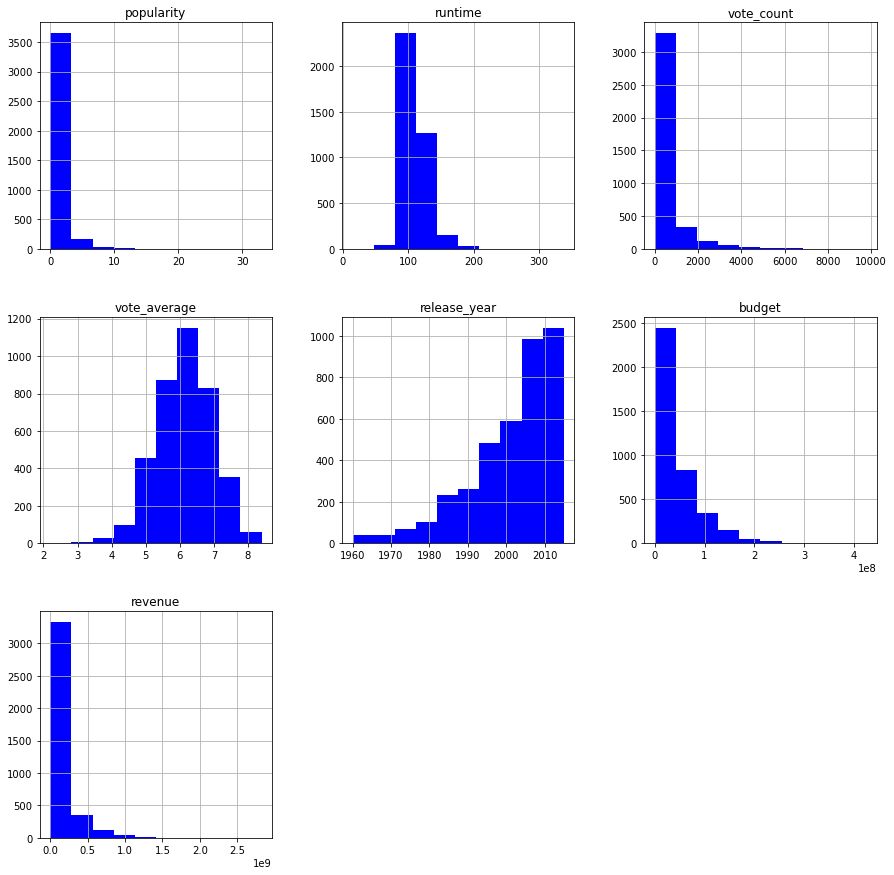

In [97]:
#create histogram of all dataset
df.hist(figsize=(15,15),color = 'blue');

### Research Question 1 (Which genres are most popular from year to year?)

In [98]:
#genres & release_year & popularity columns
df_popular_genres=df_multiple_genre[['release_year', 'genres', 'popularity']]
df_popular_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


In [99]:
#count every movie genre
df_popular_genres['genres'].value_counts()

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

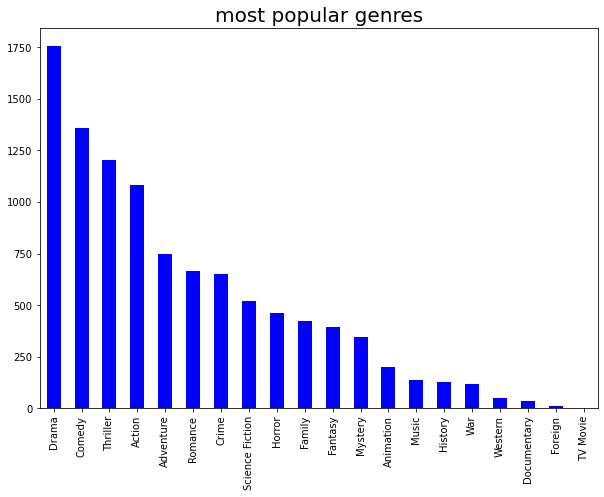

In [100]:
#create bar chart for movie's genres
df_popular_genres['genres'].value_counts().plot(kind='bar',figsize=(10,7),color = 'blue');
plt.title('most popular genres', fontsize=20);

#### Drama is the most popular genre of movies

In [101]:
#function for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]


#calculate the average popularity for each genre in each year
df_mean_popularity = df_popular_genres.groupby(['release_year', 'genres'], as_index=False).mean()

#select the most popular genre for each year
df_most_popularity = df_mean_popularity.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_popularity.head()


,release_year,genres,popularity
0,1960,Horror,2.610362
1,1960,Thriller,2.610362
2,1961,Animation,2.631987
3,1962,Thriller,3.170651
4,1963,Adventure,1.586280


Text(0, 0.5, 'release year')

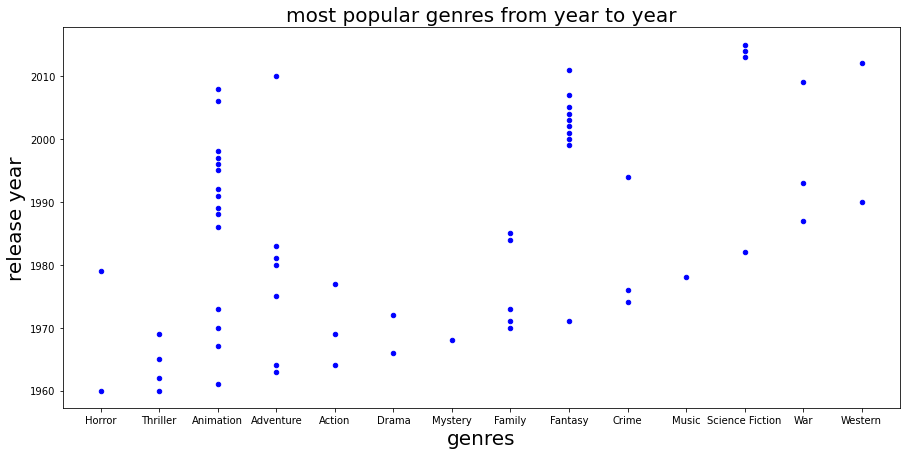

In [102]:
#creat scatter chart for most popular genres from year to year
df_most_popularity.plot(x='genres',y='release_year', kind='scatter', color = 'blue', figsize=(15,7))
plt.title('most popular genres from year to year', fontsize=20)
plt.xlabel('genres',fontsize=20)
plt.ylabel('release year',fontsize=20 )

###### every year has a popular genre, also there were some genres that were most popular for many years like :animation & adventure

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [103]:
#select the 5 highest revenues
df_high_movies_revenues=df.nlargest(5,'revenue')
df_high_movies_revenues

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget,revenue
1386,9.432768,Avatar,162.0,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,Star Wars,121.0,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,Titanic,194.0,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,The Exorcist,122.0,Drama|Horror|Thriller,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,Jaws,124.0,Horror|Thriller|Adventure,1415,7.3,1975,2.836275e+07,1.907006e+09


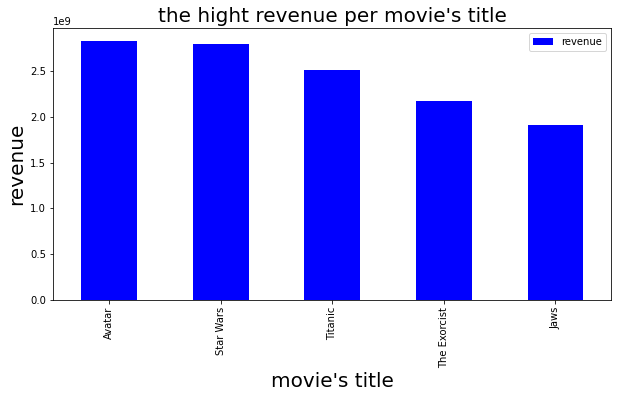

In [104]:
#create bar chart for the hight revenue per movie's title
df_high_movies_revenues.plot(x='original_title',y='revenue', kind='bar', color = 'blue', figsize=(10,5))
plt.title('the hight revenue per movie\'s title', fontsize=20)
plt.xlabel('movie\'s title',fontsize=20)
plt.ylabel('revenue',fontsize=20 )
plt.show()

#### 'Avatar' had the highest revenue

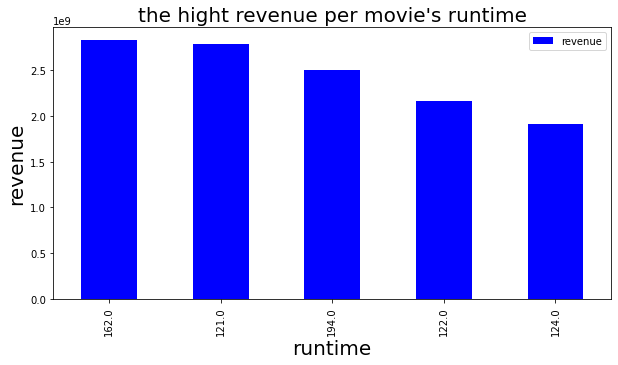

In [105]:
#create bar chart for the hight revenue per movie's runtime
df_high_movies_revenues.plot(x='runtime',y='revenue', kind='bar', color = 'blue', figsize=(10,5))
plt.title('the hight revenue per movie\'s runtime', fontsize=20)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('revenue',fontsize=20 )
plt.show()

#### the highest revenue movie's runtims :162 m

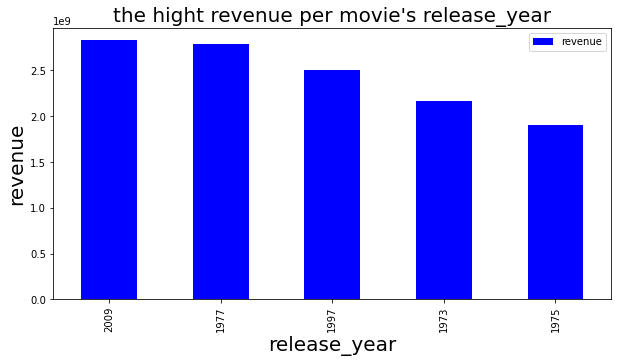

In [106]:
#create bar chart for the hight revenue per movie's release_year
df_high_movies_revenues.plot(x='release_year',y='revenue', kind='bar', color = 'blue', figsize=(10,5))
plt.title('the hight revenue per movie\'s release_year', fontsize=20)
plt.xlabel('release_year',fontsize=20)
plt.ylabel('revenue',fontsize=20 )
plt.show()

#### the highest revenue movie's release_year :2009

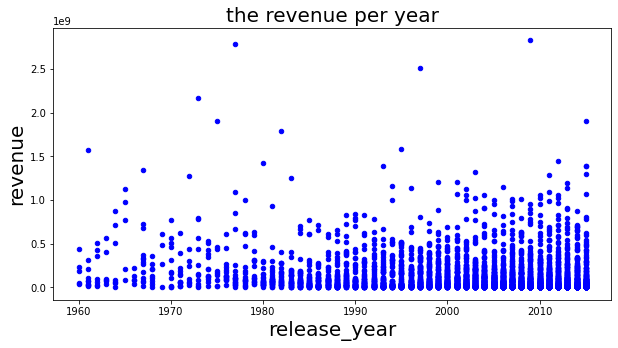

In [120]:
#create bar chart for the hight revenue per
df.plot(x='release_year',y='revenue', kind='scatter', color = 'blue', figsize=(10,5))
plt.title('the revenue per year', fontsize=20)
plt.xlabel('release_year',fontsize=20)
plt.ylabel('revenue',fontsize=20 )
plt.show()

#### the revenue increased by increasind of years

### Research Question 3  (In which year there was the hight average voting? )

In [124]:
#select average vote per year
df.groupby('release_year')['vote_average'].mean().sort_values()

release_year
2000    5.971698
2012    5.989241
2003    6.004959
2001    6.035537
2008    6.051497
2009    6.051724
1996    6.059302
2006    6.062130
1988    6.071930
2005    6.082209
1994    6.085484
2002    6.100787
2010    6.103371
2011    6.103518
2004    6.105442
1986    6.116667
1983    6.135484
1995    6.140741
1997    6.152222
1999    6.165517
1998    6.177174
2007    6.177576
1991    6.184000
2013    6.200000
1990    6.235849
2015    6.243750
1993    6.245833
1984    6.264286
1985    6.278049
1992    6.288679
1977    6.321053
1987    6.328261
2014    6.336970
1989    6.341176
1981    6.413333
1979    6.475000
1980    6.482609
1965    6.540000
1982    6.557692
1978    6.617647
1961    6.620000
1968    6.655556
1967    6.669231
1971    6.700000
1970    6.700000
1963    6.766667
1976    6.773333
1974    6.823077
1973    6.841667
1966    6.880000
1962    6.900000
1969    6.900000
1964    6.971429
1975    7.000000
1972    7.000000
1960    7.400000
Name: vote_average, dtype: float64

#### 1960 had the hight average voting

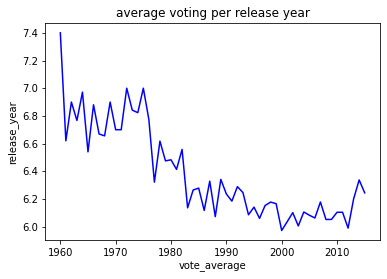

In [125]:
#creat line chart for average voting per year
voting_per_year = df.groupby('release_year')['vote_average'].mean()
plt.plot(voting_per_year , color='blue')
plt.xlabel("vote_average")
plt.ylabel("release_year")
plt.title("average voting per release year")
plt.show()

#### the average voting was decreasing during the years

In [132]:
#the average vote less than the mean
df_low = df.query(' vote_average <= 527.720291')
#the average vote more than the mean
df_high = df.query(' vote_average > 527.720291')

In [133]:
#count of the average vote less than the mean
df_low_average = df_low.count()
#count of the average vote more than the mean
df_high_average = df_high.count()

In [134]:
voting=[df_low_average,df_high_average]

In [135]:
voting

[popularity        3854
 original_title    3854
 runtime           3854
 genres            3854
 vote_count        3854
 vote_average      3854
 release_year      3854
 budget            3854
 revenue           3854
 dtype: int64,
 popularity        0
 original_title    0
 runtime           0
 genres            0
 vote_count        0
 vote_average      0
 release_year      0
 budget            0
 revenue           0
 dtype: int64]

In [130]:
colors=['blue','red']

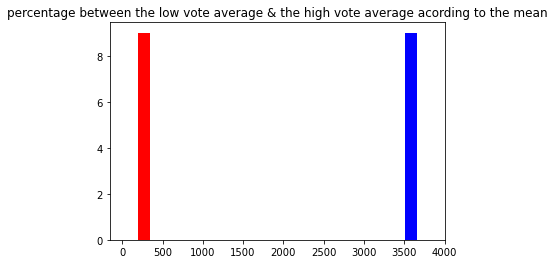

In [136]:
#Create bar chart for mean of average vote
plt.hist(voting,color = colors);
plt.title('percentage between the low vote average & the high vote average acording to the mean');

#### red:for high average voting count & blue: for low average voting count

### Research Question 4  (In which movie there was the longest & shortest runtime?)

In [137]:
df.columns

Index(['popularity', 'original_title', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year', 'budget', 'revenue'],
      dtype='object')

In [138]:
#select the runtime per movie's title
df.groupby('original_title')['runtime'].mean().sort_values(ascending=False)

original_title
Carlos                                    338.0
Cleopatra                                 248.0
Heaven's Gate                             219.0
Lawrence of Arabia                        216.0
Gods and Generals                         214.0
                                          ...  
Winnie the Pooh                            63.0
Louis C.K.: Live at the Beacon Theater     62.0
Dr. Horrible's Sing-Along Blog             42.0
Mickey's Christmas Carol                   26.0
Kid's Story                                15.0
Name: runtime, Length: 3808, dtype: float64

#### 'Carlos' had the longest runtime
#### 'Kid's Story' had the shortest runtime

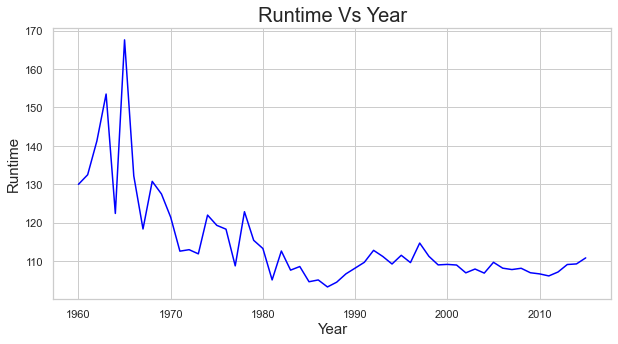

In [161]:
#create line chart for movie's runtime per year.
runtime_per_year=df.groupby('release_year').mean()['runtime']
plt.plot(runtime_per_year,color='blue')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Runtime',fontsize = 15)
plt.title("Runtime Vs Year",fontsize = 20)
plt.show()


#### movies runtime decreased during years

# 5.In which year was the largest number of movies?

In [149]:
#select the count of movies per year
df_movies_per_year=df['release_year'].value_counts()
df_movies_per_year

2011    199
2013    180
2010    178
2009    174
2006    169
2008    167
2014    165
2007    165
2005    163
2015    160
2012    158
2004    147
2002    127
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     57
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1974     13
1971     13
1967     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1960      5
1965      5
1966      5
1969      4
Name: release_year, dtype: int64

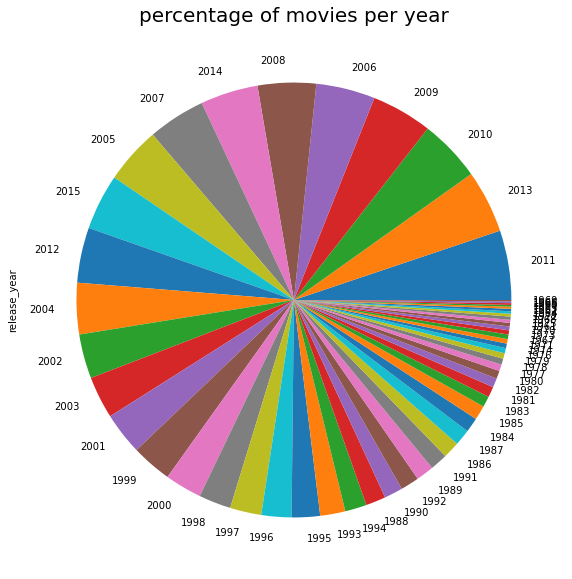

In [150]:
#create pie chart for percentage of movies per year
df_movies_per_year.plot(x='release_year',y='revenue', kind='pie', figsize=(15,10));
plt.title('percentage of movies per year', fontsize=20)
plt.show()

#### 2011 had the largest number of movies : 199

### Research Question 6  (What kinds of properties are associated with movies that have high budget?)

In [151]:
df.columns

Index(['popularity', 'original_title', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year', 'budget', 'revenue'],
      dtype='object')

In [152]:
df_high_movies_budget=df.nlargest(5,'budget').set_index('budget')
df_high_movies_budget

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,revenue
budget,,,,,,,,
4.250000e+08,0.250540,The Warrior's Way,100.0,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,1.108757e+07
3.683713e+08,4.955130,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure|Action|Fantasy,3180,6.3,2011,9.904175e+08
3.155006e+08,4.965391,Pirates of the Caribbean: At World's End,169.0,Adventure|Fantasy|Action,2626,6.8,2007,1.010654e+09
2.920507e+08,1.957331,Superman Returns,154.0,Adventure|Fantasy|Action|Science Fiction,834,5.3,2006,4.230205e+08
2.716921e+08,4.355219,Titanic,194.0,Drama|Romance|Thriller,4654,7.3,1997,2.506406e+09


#### the properties of the movie which had highest budget :
#### title : The Warrior's Way &&  runtime : 100 m  && realease year : 2010

In [164]:
df.to_csv('tmd_v2.csv', index=False)

# Conclusions

* every year has a popular genre, also there were some genres that were most popular for many years like :animation & adventure.
> 'Drama' is the most popular genre of movies.

* the revenue increased by increasind of years
* properties are associated with movie that have highest revenue:
>1.title : Avatar.
>2.runtime : 162.
>3.release year : 2009.

* the average voting was decreasing during the years.
>year had the hightest average voting :1960. 

* movies runtime decreased during years
* the longest runtime movie was: 'Carlos'
* the shortest runtime was:      'Kid's Story'


* the largest number of movies:
>year : 2011.
>number of movies : 199.

* the properties of the movie which had highest budget :
>title : The Warrior's Way.
>runtime : 100 m .
>realease year : 2010.

# Limitations

* there were many data that had been cleaned which made the number of movies decrease which made affected the results.
* there was a column containing multi values separated by '|', and when separated these values, there was data redundancy.
